# Lab 5 - 6

What are some major stress factors for students? In this lab we will be analyzing data from our csv file to look at possible stressors for students.
- The data file is : CS105 Lab 5 Data - Form Responses 1.csv

# Question 1

1. What information do we have? 

The data that we will examine in this lab contains data about students in professor Elena's classes CS111 and CS105, including:
- The school year the student is in and how they are paying for their studies.
- How many units they're enrolled in this quarter and the state of their grades for this quarter. 
- How many hours they sleep and if they feel mentally present. 
- Time they spend on their homework per week.
- Their stress levels.
- Their commute times.
- The amount of time they spend on hobbies per week. 
- How they feel towards the statement: "My parents influenced my decision to go to college".

# Question 2

2. What would we like to know?

We want to find contributors of stress based on the data we collected through the survey. We will be analyzing different possible contributors to find a correlation between them and the stress level of students.

# Question 3

Exploring the data

Our data is stored in the CSV file `CS105 Lab5 Data - Form Responses 1.csv`. We read in the data into a Pandas `DataFrame` and display it.

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("CS105 Lab 5 Data - Form Responses 1.csv")
df

School Year                  College Payment Method  Units This Quarter  \
0        Senior  My parents/relatives are paying for me                16.0   
1        Senior                                    Loan                12.0   
2        Senior                             Scholarship                12.0   
3        Junior  My parents/relatives are paying for me                17.0   
4        Senior                             Scholarship                12.0   
..          ...                                     ...                 ...   
184      Junior                            I pay myself                12.0   
185      Junior  My parents/relatives are paying for me                12.0   
186      Junior  My parents/relatives are paying for me                13.0   
187      Junior  My parents/relatives are paying for me                13.0   
188      Senior  My parents/relatives are paying for me                16.0   

     Hours of Sleep per Day  Mentally Present  State of Grades this Quarter  \
0                       8.0                 1                             2   
1                       6.0                 2                             3   
2                       8.0                 5                             4   
3                       7.0                 2                             2   
4                       6.0                 2                             3   
..                      ...               ...                           ...   
184                     6.0                 2                             4   
185                     8.0                 5                             5   
186                     6.0                 4                             3   
187                     8.0                 1                             4   
188                     6.0                 2                             4   

     Time Spent on Homework per Week        GPA  Study Hours  Stress Levels  \
0                                6.0  2.5 - 2.9         10.0              5   
1                                8.0  3.0 - 3.4          3.0              5   
2                               20.0  3.5 - 4.0          4.0              5   
3                               12.0  3.0 - 3.4          8.0              4   
4                                6.0  3.5 - 4.0          3.0              5   
..                               ...        ...          ...            ...   
184                             20.0  3.5 - 4.0         45.0              3   
185                              5.0  3.0 - 3.4         10.0              5   
186                             12.0  2.5 - 2.9          6.0              4   
187                              5.0  3.0 - 3.4         10.0              3   
188                              6.0  3.5 - 4.0         12.0              4   

     Commute Time  Hobby Hours  Influenced by Parents  
0               5          2.0                      4  
1               5         20.0                      4  
2               3         10.0                      3  
3               2          8.0                      5  
4               2         12.0                      3  
..            ...          ...                    ...  
184             3         20.0                      5  
185             2          8.0                      2  
186             4         14.0                      1  
187             4         20.0                      1  
188             4          8.0                      4  

[189 rows x 13 columns]

### Displaying Stress Level Distribution

In [2]:
stressed= df["Stress Levels"].value_counts() #Returns a series containing counts of unique values

import matplotlib.pyplot as plt
%matplotlib inline
x = [4,5,3,2,1]
plt.figure()
#use bar
plt.bar(x,stressed)
plt.title('Stress Levels of Students')
plt.xlabel('Stress Levels')
plt.ylabel('Number of Students')
plt.show()

**Explanation:** This bar plot shows that over 80 students said they are at a stress level of four. Meaning there are more stressed students then non stressed students.

### Studying and Hobbies Distributed Through Levels of Stress

In [3]:
tempdf = pd.read_csv("CS105 Lab 5 Data - Form Responses 1.csv")
crystal_df = tempdf.filter(items=['Stress Levels', 'Hobby Hours', 'Study Hours']) 
crystal_df = crystal_df.replace(' ', np.nan, regex=True) #replace empty cells with NaN
crystal_df = crystal_df.dropna() #drop rows with cells that have NaN data
crystal_df = crystal_df.reset_index(drop=True) #reset the indecies with dropped rows
crystal_df["Stress Levels"]= crystal_df["Stress Levels"].astype(float)
crystal_df["Hobby Hours"]= crystal_df["Hobby Hours"].astype(float)
graph = crystal_df.groupby("Stress Levels")["Hobby Hours"].mean()
crystal_df["Stduy Hours"]= crystal_df["Study Hours"].astype(float)
graph2 = crystal_df.groupby("Stress Levels")["Study Hours"].mean()
dif = pd.DataFrame({'Hobby Hours': graph,
                   'Study Hours': graph2})
ax = dif.plot.bar()


**Explanation:**
    This graph shows the mean of hours spent on studying and hobbies distributed through levels of stress. We can see that there doesn’t seem to be a trend of any kind. An interesting point is that when there is a balanced amount of time dedicated to studying and hobbies, the students’ stress levels land at a 3. This implies that with balanced work/life a student’s stress level is averaged out.

### Year and Units Enrolled in Distributed Through Levels of Stress

Stress Levels        1          2      3          4          5
School Year                                                   
Graduate Student   NaN  12.000000  12.00  12.000000        NaN
Junior            14.0  12.200000  13.10  13.987179  13.270833
Senior            17.0        NaN  13.25  14.000000  13.921053
Sophomore         17.5  15.666667  15.55  15.815789  14.590909


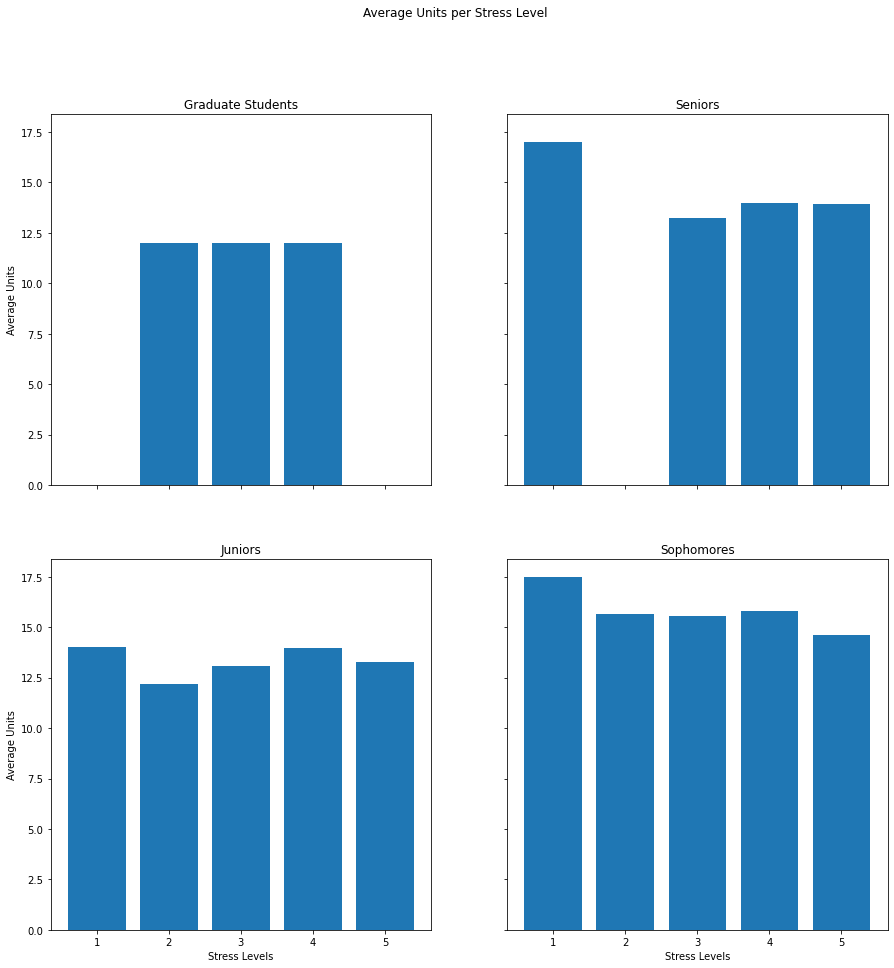

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
units_vs_stress = pd.crosstab(df["School Year"], df["Stress Levels"],
               values = df["Units This Quarter"], aggfunc = 'mean')
print(units_vs_stress)
grad_students = units_vs_stress.iloc[0].fillna(0)
senior_students = units_vs_stress.iloc[2].fillna(0)
junior_students = units_vs_stress.iloc[1]
soph_students = units_vs_stress.iloc[3]
#Avg units vs. Stress bar plots per school year
labels = ["1", '2', '3', '4', '5']
fig, ax = plt.subplots(2,2, sharex=True, sharey=True)
fig.set_figheight(15)
fig.set_figwidth(15)
ax[0, 0].bar(labels, grad_students)
ax[0,0].set_title("Graduate Students")
ax[0,1].bar(labels, senior_students)
ax[0,1].set_title("Seniors")
ax[1,0].bar(labels, junior_students)
ax[1,0].set_title("Juniors")
ax[1,1].bar(labels, soph_students)
ax[1,1].set_title("Sophomores")
fig.suptitle("Average Units per Stress Level")
plt.setp(ax[-1, :], xlabel="Stress Levels")
plt.setp(ax[:, 0], ylabel= "Average Units")
plt.show()


**Explanation:**
    As we can see from these 4 graphs, the average units of students are evenly distributed across all stress levels. 

### Hours of Sleep per Day and Stress Levels

<AxesSubplot:title={'center':'Hours of Sleep per Day'}, xlabel='Stress Levels'>

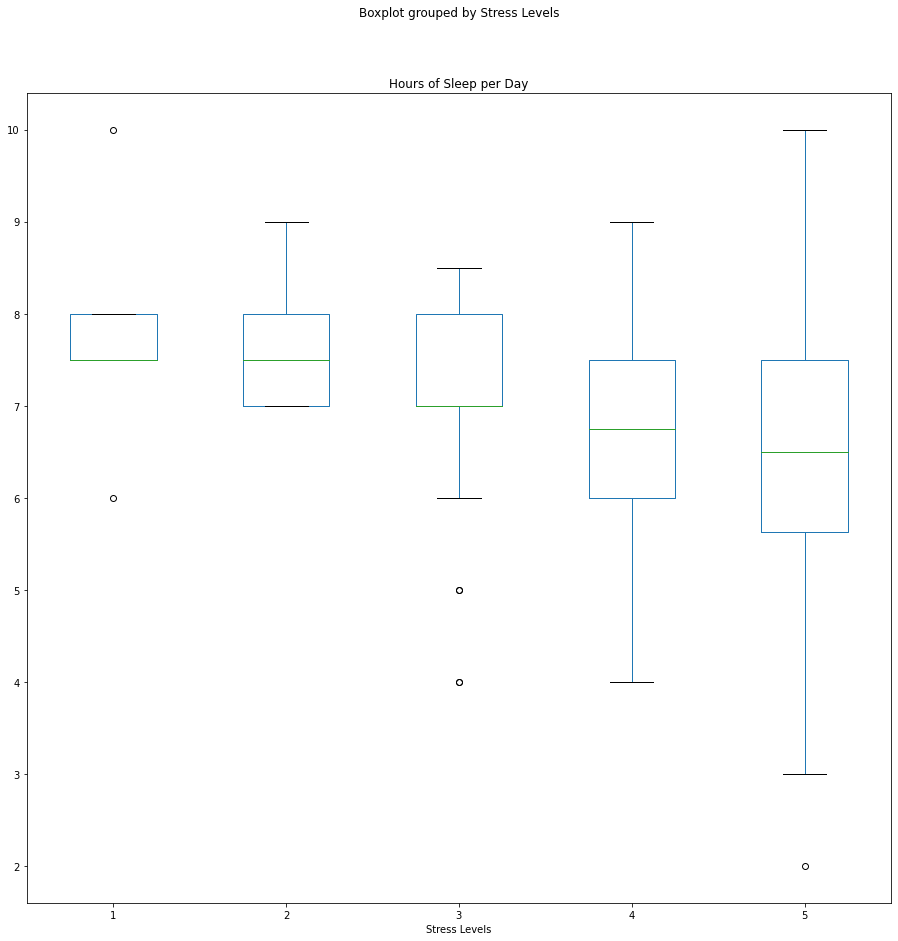

In [5]:
#Box plot of sleep vs stress
df.boxplot(by='Stress Levels', column=["Hours of Sleep per Day"], grid=False, figsize=(15,15))

**Explanation:** From this visualization we can see that the students with the highest stress levels have the largest range of sleep hours, and there is a slight decrease in the average hours of sleep with each increment of stress level.

### Influenced by Parents to Get Higher Education and Stress Levels

In [6]:
df = pd.read_csv("CS105 Lab 5 Data - Form Responses 1.csv")
influence = df["Influenced by Parents"].value_counts()
influence

4    57
5    49
3    42
2    22
1    19
Name: Influenced by Parents, dtype: int64

In [7]:
stressed

4    82
5    54
3    39
2     9
1     5
Name: Stress Levels, dtype: int64

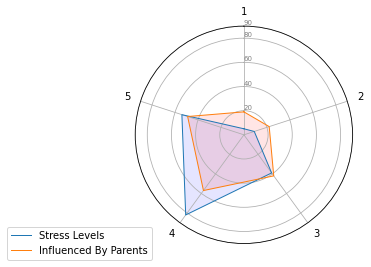

In [8]:
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
 
# Set data
df = pd.DataFrame({
'group': ['Stressed','Influenced'],
'1': [5, 19],
'2': [9, 22],
'3': [39, 42],
'4': [82, 57],
'5': [54, 49]
})
 
# ------- PART 1: Create background
 
# number of variable
categories=list(df)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([20,40,60,80,90], ["20","40","60","80","90"], color="grey", size=7)
plt.ylim(0,90)
 

# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't make a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=df.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Stress Levels")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values=df.loc[1].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Influenced By Parents")
ax.fill(angles, values, 'r', alpha=0.1)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Show the graph
plt.show()

**Explanation:** The above radar chart compares the stress levels of a student and their opinion on the statement: "My parents influenced my decision to go to college". We see that mostly students somewhat agree (4) to the fact that their parents influenced on their decision to get a higher education. Also, that most students have a stress level of four. 

### Study Hours Throught Student's School Year

In [9]:
#Insert Code here
data_df = pd.read_csv("CS105 Lab 5 Data - Form Responses 1.csv")
data_df = data_df[data_df["Study Hours"].notnull()].reset_index(drop=True)
studyHours = [0.0, 0.0, 0.0, 0.0]
studyHours[0] = (data_df["Study Hours"].loc[data_df["School Year"] == "Sophomore"].sum()) / (data_df["School Year"].loc[data_df["School Year"] == "Sophomore"].count())
studyHours[1] = (data_df["Study Hours"].loc[data_df["School Year"] == "Junior"].sum()) / (data_df["School Year"].loc[data_df["School Year"] == "Junior"].count())
studyHours[2] = (data_df["Study Hours"].loc[data_df["School Year"] == "Senior"].sum()) / (data_df["School Year"].loc[data_df["School Year"] == "Senior"].count())
studyHours[3] = (data_df["Study Hours"].loc[data_df["School Year"] == "Graduate Student"].sum()) / (data_df["School Year"].loc[data_df["School Year"] == "Graduate Student"].count())
import matplotlib.pyplot as plt
%matplotlib inline
x = ["Sophomore", "Junior", "Senior", "Graduate Student"]
plt.figure()
plt.subplot(111)
plt.xlabel("School Year")
plt.ylabel("Study Hours")
plt.bar(x, studyHours)
plt.title("Average Amount of Study Hours of Student in CS 105 and CS 111 based on School Year")
plt.show()
#The amount of study hours increases based on the School Year of the student

**Explanation:** Using the mean of the amount of time students study, we can see that between the 4 present school years in the data set the amount of time that students spend studying increases on average the longer that they have been in school for.

### Correlation Heatmap

In [10]:
#Correlation heat map
df = pd.read_csv("CS105 Lab 5 Data - Form Responses 1.csv")
df["Hobby Hours"] = df["Hobby Hours"].fillna(0)
for row in df["Hobby Hours"].index:
  if df["Hobby Hours"][row] == "na":
    df.loc["Hobby Hours", row] = 0
df["Hobby Hours"] = df["Hobby Hours"].apply(float)
plt.figure(figsize=(15,15))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title("Correlation Heatmap", pad=1)
plt.show()

**Explanation:** This visualization identifies the features which have the highest correlations. We can see that study hours and time spent on homework are the most correlated variables in our dataset, which is to be expected. When looking at the possible indicators of stress, however, most of the features are hardly correlated, which leads us to believe that the numerical features in our study are not reliable sources for identifying stress levels in students. Instead, other features such as school year or parental influence in college decisions will be analyzed.

# Question 4

### Hypothesis 1:
After exploring our dataset, we found that there wasn't any numerical feature that had a strong correlation with stress, therefore we wanted to analyze the correlation between a student's school year and stress. Given the lack of correlation we witnessed, we expect that the school year of a student will not correlate with their stress levels, however, for the sake of our Chi-Squared test, our hypothesis is: "Stress is dependent on a student's school year". Thus, our null hypothesis is: "Stress levels and a student's school year are independent".

### Hypothesis 2: 
For our second hypothesis, we believe that a student's units and their stress are positively correlated.

### Hypothesis 3: 
For our third hypothesis, we believe that the amount of hours a students sleeps and their stress level is negatively correlated.

# Question 5

### Test 1 for Hypothesis 1:
We will be performing the chi-squared test between the school year the student is in and their stress levels.

In [11]:
import numpy as np
import pandas as pd
from scipy.stats import chisquare
data_df = pd.read_csv("CS105 Lab 5 Data - Form Responses 1.csv")
stress_year_counts = pd.crosstab(data_df["School Year"], data_df["Stress Levels"])
stress_counts = stress_year_counts.sum(axis=0)
year_counts = stress_year_counts.sum(axis=1)
total = year_counts.sum()
expectedValues = np.array([[0.0, 0.0, 0.0, 0.0, 0.0],[0.0, 0.0, 0.0, 0.0, 0.0],[0.0, 0.0, 0.0, 0.0, 0.0],[0.0, 0.0, 0.0, 0.0, 0.0]])
for i in range(4):
    for j in range(5):
        expectedValues[i][j] = (stress_counts[j+1]*year_counts[i])/total
#expectedValues
#stress_year_counts
#total

In [12]:
chisquareValue = chisquare(stress_year_counts, f_exp=expectedValues, axis=None, ddof=12)
print(chisquareValue)
print("Chisquare Value: 10.94")

Power_divergenceResult(statistic=10.941532624557016, pvalue=0.1411897509367594)
Chisquare Value: 10.94


**Conclusion:** After computing the chi-squared value for our test, we have a value of 10.94. Given our degrees of freedom of 12, as well as an alpha value of 0.05, we can conclude that our null hypothesis cannot be rejected, and therefore, we have that stress levels and the school year of a student are independent.

**Hand work**:

### Test 2 for Hypothesis 2:
For the next two tests we will be performing the Pearson correlation test. For Hypothesis 2 it will be performed between the units a student is enrolled in and their stress levels. 

In [13]:
#correlation between units and stress
corr_between_units_stress = df["Units This Quarter"].corr(df["Stress Levels"])
print("The Pearson correlation coefficient between units and stress is ", corr_between_units_stress)

The Pearson correlation coefficient between units and stress is  -0.042805026329210016


**Conlusion:** Given our correlation coefficient of -0.042, stress and a student's units have a very small negative correlation. In fact, since the magnitude of the coefficient is so small, we can draw the conclusion that these two variables are not correlated.

**Hand Work**: Here, we demonstrated that the Pearson Correlation test code we used in the lab works accurately as shown in the sample code and hand written work for test 2. 

In [14]:
import pandas as pd
sample2 = {'Units This Quarter': [16.0,12.0,12.0,17.0,12.0], 'Stress Levels': [5.0,5.0,5.0,4.0,5.0]}
sample2_df = pd.DataFrame(data=sample2)
corr_between_units_stress = sample2_df["Units This Quarter"].corr(sample2_df["Stress Levels"])
print("The Pearson correlation coefficient between units and stress is ", corr_between_units_stress)

The Pearson correlation coefficient between units and stress is  -0.7184212081070996


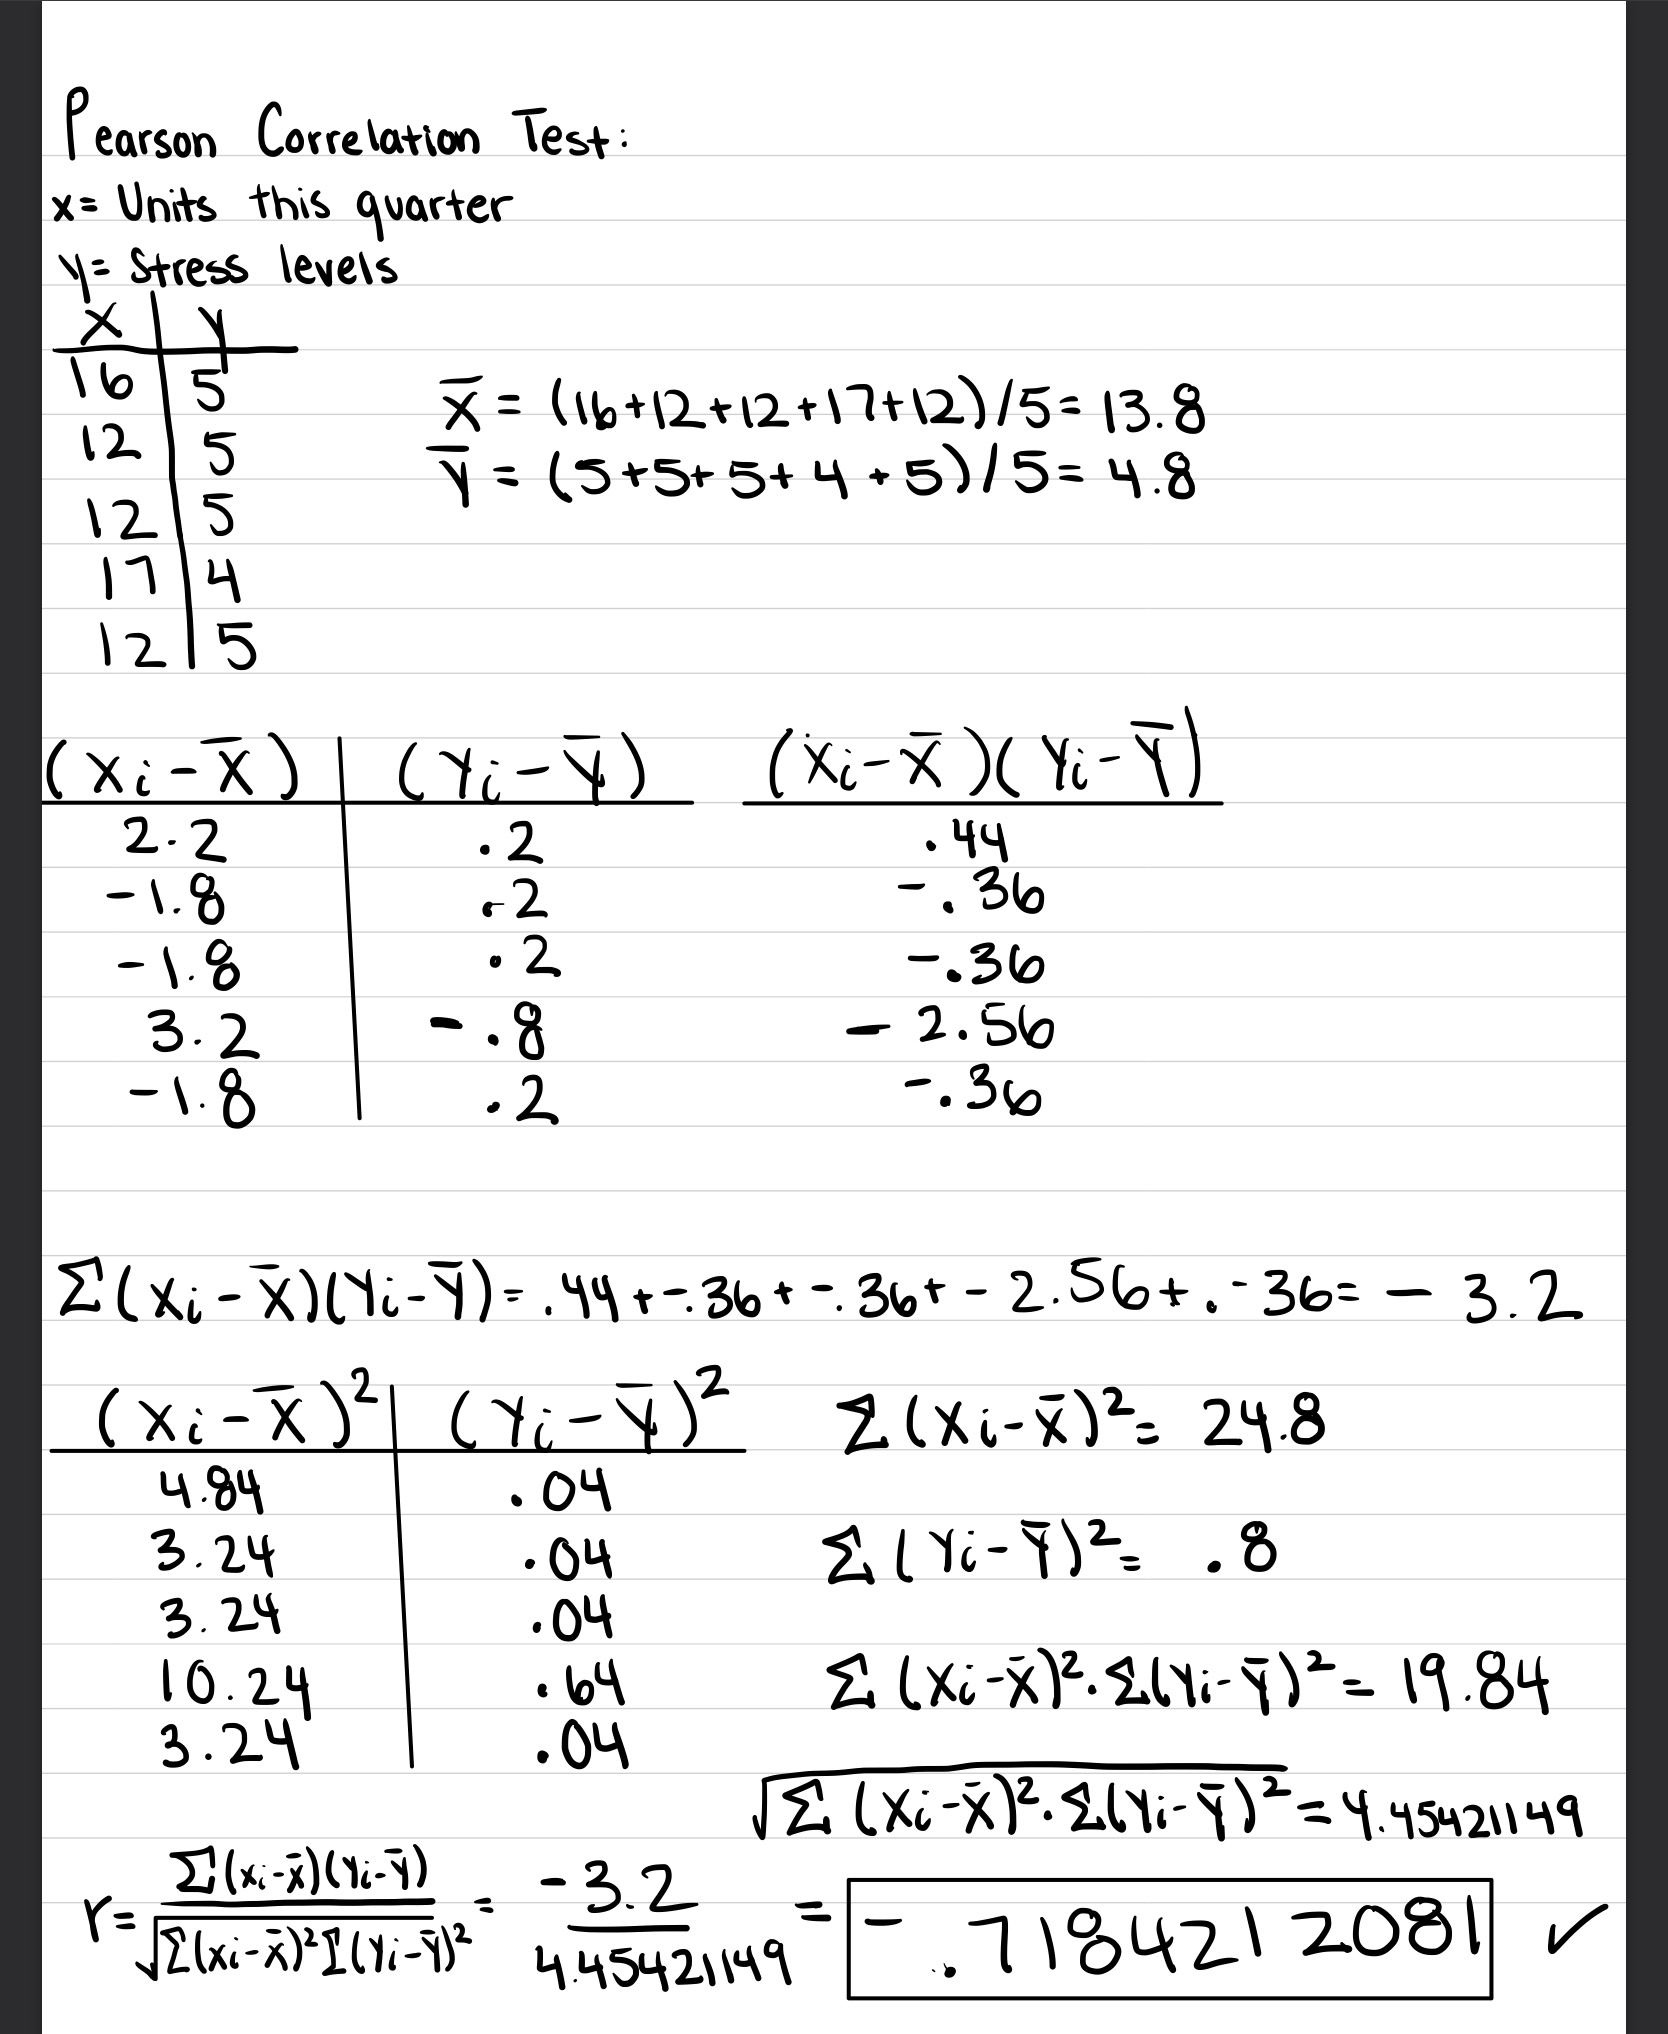

### Test 3 for Hypothesis 3:
For this hypothesis 3, the Pearson correlation test is between the hours of sleep a student gets in a day and their stress level. 

In [15]:
#correlation between hours of sleep per day and stress levels 
corr_between_sleep_stress = df["Hours of Sleep per Day"].corr(df["Stress Levels"])
print("The Pearson correlation coefficient between hours of sleep per day and the student's stress is ", corr_between_sleep_stress)

The Pearson correlation coefficient between hours of sleep per day and the student's stress is  -0.24465846085860773


**Conlusion:** The magnitude of the correlation coefficient between stress and hours of sleep for students is relatively large compared to all of the other features analyzed. Therefore, we can conclude that these two variables have a negative correlation, and hours of sleep may be a strong indicator of stress in students.

**Hand work**: Here, we demonstrated that the Pearson Correlation test code we used in the lab works accurately as shown in the sample code and hand written work for test 3. 


In [16]:
import pandas as pd
sample3 = {'Hours of Sleep per Day': [8.0,4.0,6.0], 'Stress Levels': [5.0,4.0,3.0]}
sample3_df = pd.DataFrame(data=sample3)
corr_between_sleep_stress = sample3_df["Hours of Sleep per Day"].corr(sample3_df["Stress Levels"])
print("The Pearson correlation coefficient between hours of sleep per day and the student's stress is ", corr_between_sleep_stress)

The Pearson correlation coefficient between hours of sleep per day and the student's stress is  0.5


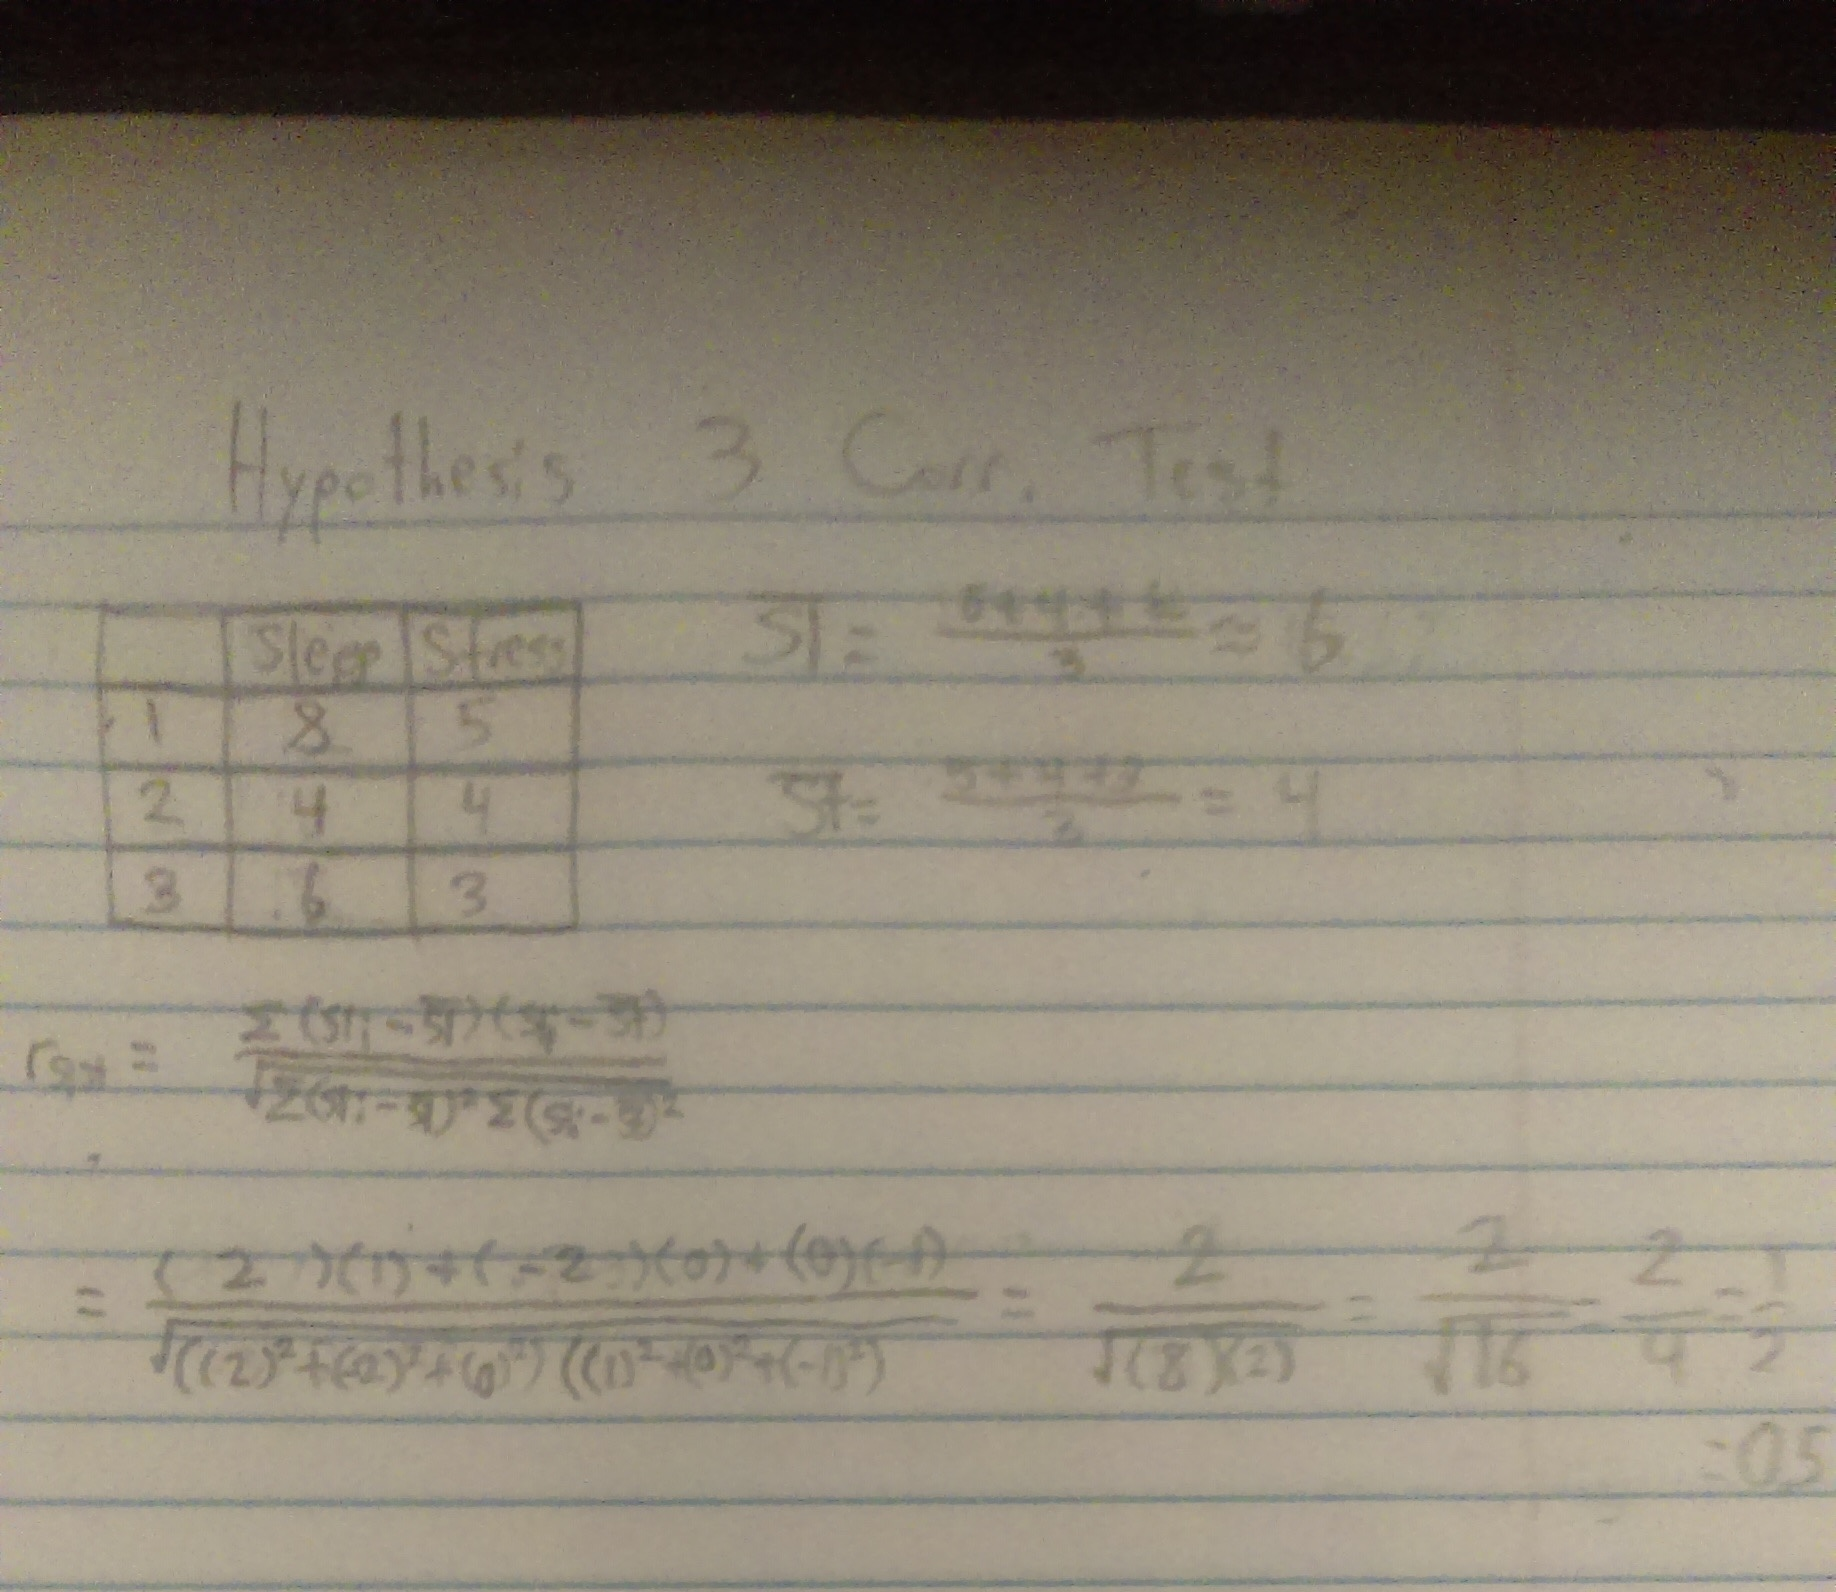